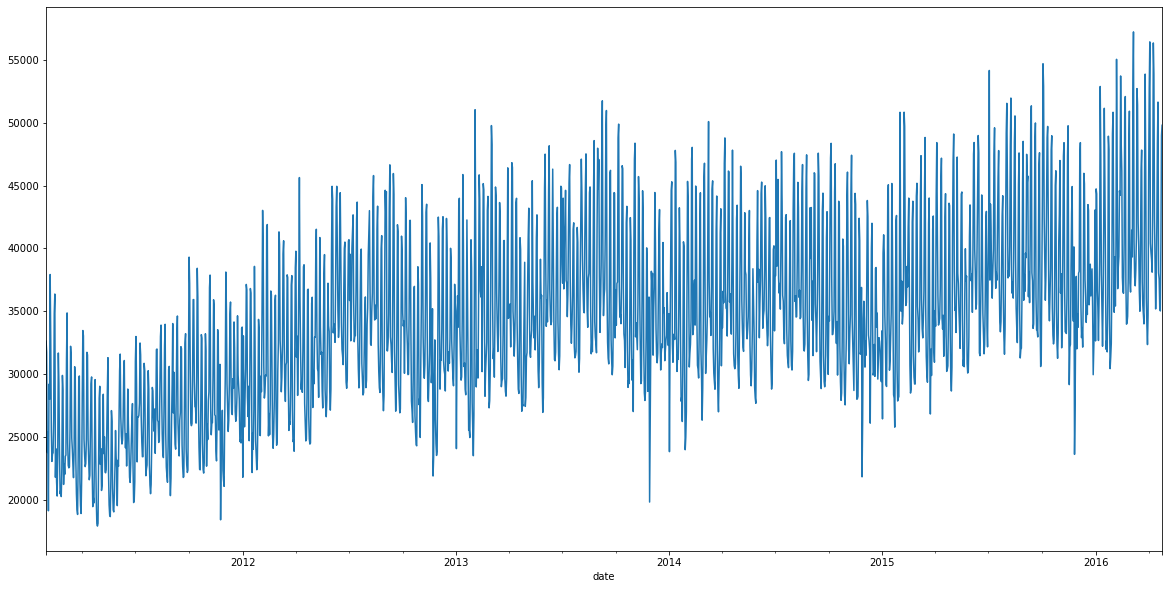

In [1]:
import pandas as pd
import numpy as np

calendar_data = pd.read_csv('../data/processed/calendar_processed-May-13-2022.csv')
calendar_data["date"] = pd.to_datetime(calendar_data["date"])
calendar_data = calendar_data.dropna(subset=['total_sales'])
calendar_data.loc[calendar_data["total_sales"] < 1000, "total_sales"] = np.NaN
calendar_data['total_sales'].interpolate(method='linear', inplace=True)
total_sales = calendar_data.set_index("date")['total_sales']
total_sales.plot(figsize=(20, 10))

In [2]:
total_sales.isnull().sum()

0

In [3]:
total_sales[total_sales.isnull()]

Series([], Name: total_sales, dtype: float64)

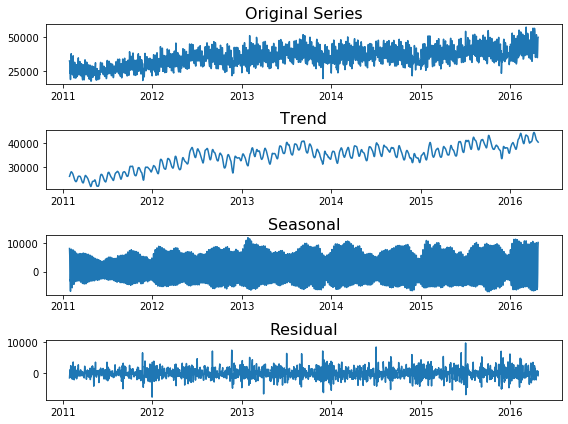

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

stl = STL(total_sales)
result = stl.fit()

seasonal, trend, resid = result.seasonal, result.trend, result.resid

plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(total_sales)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

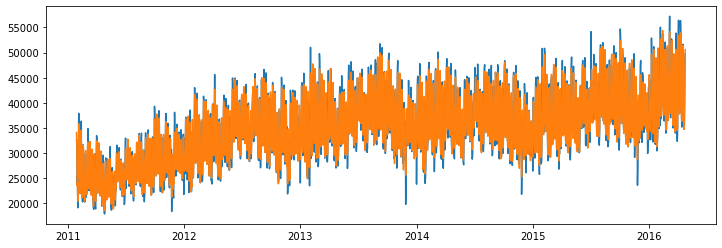

In [5]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(total_sales)
plt.plot(estimated)

In [6]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(734138.0, 736116.0)

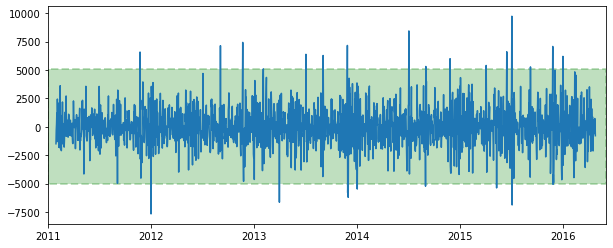

In [7]:
from datetime import datetime

plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2011,1,1), datetime(2016,6,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2011,1,1), datetime(2016,6,1))

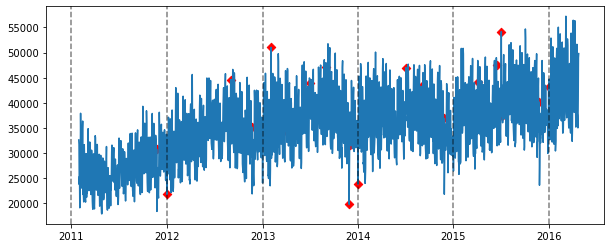

In [8]:
anomalies = total_sales[(resid < lower) | (resid > upper)]

plt.figure(figsize=(10,4))
plt.plot(total_sales)
for year in range(2011,2017):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies, color='r', marker='D')